In [1]:
# Notebook Purpose:
#
# To run a linear regression on formatted dataset
# Note: see NYC Taxi project for previous regression

In [2]:
data_url = 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
tdum = pd.read_csv('homefeatures.csv', index_col=0)

tdum.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,30,40,45,50,60,70,...,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,7,2003,856,1710,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,6,1976,1262,1262,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,7,2001,920,1786,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,7,1915,756,1717,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8,2000,1145,2198,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
ttar = pd.Series.from_csv('hometarget.csv')

ttar.head()

C:\Users\liamk\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


0    208500
1    181500
2    223500
3    140000
4    250000
dtype: int64

In [39]:
# verify that feature and target match
print(tdum.shape)
print(ttar.shape)

(1460, 54)
(1460,)


In [9]:
tdum.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,30,40,45,50,60,70,...,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,7,2003,856,1710,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,6,1976,1262,1262,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,7,2001,920,1786,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,7,1915,756,1717,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8,2000,1145,2198,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(tdum, ttar)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1095, 54) (365, 54) (1095,) (365,)


ML Linear Regression

In [41]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

print ('Fit a model x_train, and  calculate the MSE with x_test and y_test: %.2f' 
      %np.mean((y_test - pred_test)**2))

print ('Fit a model x_train, and  calculate the MSE with y_train: %.2f' 
      %np.mean((y_train - pred_train)**2))

Fit a model x_train, and  calculate the MSE with x_test and y_test: 942125322.50
Fit a model x_train, and  calculate the MSE with y_train: 1197054616.63


In [43]:
pred_train

array([114063.00750486, 224112.45197705, 101931.93205654, ...,
        60136.58036755, 276527.97238837, 169268.33641852])

Text(0.5,1,'Residual Plots')

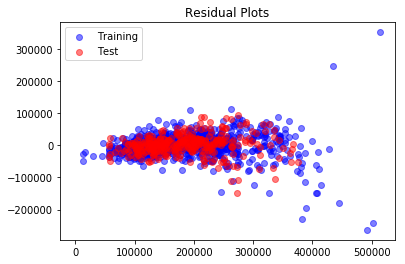

In [47]:
train = plt.scatter(pred_train,(pred_train - y_train),
                   c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - y_test),
                  c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='best')

plt.hlines(y=0,xmin=0,xmax=40)

plt.title('Residual Plots')

In [48]:
pred = lreg.score(x_test,y_test)

print ('Prediction accuracy is %2.2f%%' %(pred*100))

Prediction accuracy is 81.03%


In [ ]:
# part 3 complete for now; will revisit with other features